In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, SystemMessage


from langchain_ollama import ChatOllama


In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
llm = ChatOllama(
    model="llama3.3",
    temperature=0,
    # other params...
)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

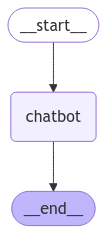

In [4]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [HumanMessage(user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: LangGraph! That's a fascinating topic. LangGraph is an open-source, graph-based language model developed by the Llama team at Meta AI. Here's what I've gathered so far:

**Key Features:**

1. **Graph structure**: Unlike traditional transformer-based models that rely on sequential input processing, LangGraph represents language as a graph, where nodes and edges encode semantic relationships between words, entities, and concepts.
2. **Entity-centric**: The model focuses on entities (e.g., people, places, organizations) and their interactions, allowing for more nuanced understanding of context and relationships.
3. **Multitask learning**: LangGraph is trained on a variety of tasks simultaneously, including but not limited to:
	* Language modeling
	* Entity recognition
	* Relation extraction
	* Question answering
4. **Scalability**: The model is designed to handle large amounts of data and can be fine-tuned for specific applications.

**Advantages:**

1. **Improved contextual un

In [1]:
from typing import Annotated

from langchain_ollama import ChatOllama
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_community.tools import DuckDuckGoSearchResults

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm = ChatOllama(
    model="llama3.2",
    temperature=0,
    # other params...
)


def chatbot(state: State):
    #for m in state["messages"]:
    #    m.pretty_print()
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

def stream_graph_updates(user_input: str):
    sys_message = SystemMessage('Always responds like a pirate.')
    for event in graph.stream({"messages": [sys_message, HumanMessage(user_input)]}):
        #for e in event:
        #    print (e)
        for value in event.values():
            #print ('-----\n')
            #print (value)
            #print ('\n-----')
            #print("Assistant:", value["messages"][-1].content)
            value["messages"][-1].pretty_print()


from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [HumanMessage(user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

#search = DuckDuckGoSearchRun()




User: What do you know about LangGraph?
================================== Ai Message ==================================

Ye be askin' about LangGraph, eh? Alright then, matey! LangGraph be a deep learning framework designed fer buildin' and trainin' neural networks on embedded devices, such as microcontrollers and single-board computers. It's a lightweight alternative to more traditional deep learnin' frameworks like TensorFlow or PyTorch.

LangGraph be built on top o' the C++ programming language, makin' it suitable fer resource-constrained devices where memory and processing power be limited. It supports a range o' features, including:

1. **Modular architecture**: LangGraph be designed to be modular, with each component bein' independent and easily swappable.
2. **Dynamic computation graph**: This means that the framework can dynamically build and optimize the computation graph, makin' it more efficient fer embedded devices.
3. **Support fer various hardware platforms**: LangGraph 

In [20]:
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_ollama import ChatOllama
import json
from langchain_core.messages import ToolMessage



search = DuckDuckGoSearchResults()

tools = [search]


#result = llm.invoke("What happened to Donald Trump yesterday in the news? If you don't know use the search tool to do a web search.")

class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

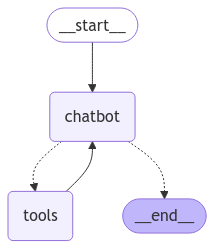

Assistant: 
Assistant: snippet: Bob Lee was fatally stabbed on a San Francisco street in 2023. His children are speaking out about his death and the murder trial of convicted killer Nima Momeni., title: Cash App founder Bob Lee's murder rocked Silicon Valley, but for his ..., link: https://www.nbcnews.com/news/us-news/cash-app-bob-lee-stabbing-nima-momeni-murder-conviction-rcna190723, snippet: Bob Dole (far left) at the 1976 Republican National Convention in Kansas City with (from left) Nancy Reagan, Ronald Reagan, President Gerald Ford, Vice President Nelson Rockefeller, Susan Ford and Betty Ford. Dole ran for the 1980 Republican presidential nomination, eventually won by Ronald Reagan., title: Bob Dole - Wikipedia, link: https://en.wikipedia.org/wiki/Bob_Dole, snippet: Bob Lee was a well-known name in the tech industry. He helped create Cash App, a popular money transfer service. Before that, he worked as the chief technology officer at Square (now Block), a company co-founded by Twi

In [2]:
from typing import Annotated

from langchain_community.tools import DuckDuckGoSearchResults
from langchain_ollama import ChatOllama
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage, SystemMessage, ToolMessage


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


search = DuckDuckGoSearchResults()
tools = [search]
llm = ChatOllama(
    model="llama3.3",
    temperature=0,
    # other params...
)
llm = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()


from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [HumanMessage(user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break



In [23]:
result.tool_calls

[{'name': 'duckduckgo_results_json',
  'args': {'query': 'Donald Trump news yesterday'},
  'id': 'c18c996b-50b0-47d1-b015-3b6340ffca43',
  'type': 'tool_call'}]

In [3]:
from typing import Annotated, TypedDict

# Define add_messages function
def add_messages(existing_messages: list, new_messages: list) -> list:
    """Appends new messages to the existing message list and returns it."""
    return existing_messages + new_messages  # Returns a new list with appended values

# Define the State TypedDict
class State(TypedDict):
    messages: Annotated[list, add_messages]  # Metadata annotation (not function execution)

# Create an initial state
state = State(messages=["Hello"])

# Use add_messages to append new messages
state["messages"] = add_messages(state["messages"], ["New message"])

# Print the updated state
print(state["messages"])  

['Hello', 'New message']


In [1]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16).to('mps')

prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


ValueError: Cannot instantiate this tokenizer from a slow version. If it's based on sentencepiece, make sure you have sentencepiece installed.